In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Initial Values 
# I = infected population
# R = Recovered Population
# S = Susceptible Population
# assumption - constant population size

I=10**(-6)
R=0
S=1-10**(-6)
y=np.array([S,I,R])

In [3]:
#Setting constants
beta=np.arange(0,1,0.0001)
gamma=0.1

max_I=np.empty(len(beta))

In [4]:
def model(y, t,b,gamma):
    S = y[0]
    I = y[1]
    R = y[2]
    
    lamda = b*I
    dS = -lamda*S
    dI = lamda*S - gamma*I
    dR = gamma*I
    
    return [dS, dI, dR]
        
# assuming teq = 1000 days
teq = 1000
# getting an interval of 't'
t = np.arange(0, teq, 1)
        
#beta=0.001
for i in range(len(beta)):
    table_data = odeint(model,y, t, args=(beta[i],gamma))
    table_dataframe = pd.DataFrame(table_data, columns = ['S', 'I', 'R'])
    max_I[i]=np.max(table_dataframe['I'])

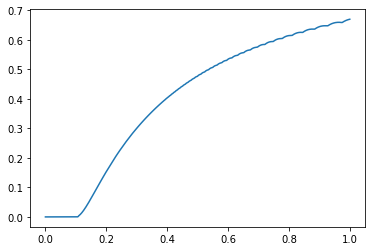

In [5]:
plt.plot(beta,max_I)

In [6]:
print('Value of beta is approximately',0.29)

Value of beta is approximately 0.29
